In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [3]:
%%time
#Using generator for loading such huge image data
train_data = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256) #It will make all the images of uniform size
)

test_data = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256) #It will make all the images of uniform size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
CPU times: user 3.38 s, sys: 2.01 s, total: 5.38 s
Wall time: 46.9 s


In [4]:
# from PIL import Image
# for images, labels in test_data:
#     image = keras.preprocessing.image.array_to_img(images[0])
#     image.show()
# #     plt.imshow(images[21].numpy().astype("uint8"))
#     break

In [5]:
#Normalization
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_data = train_data.map(process)
test_data = test_data.map(process)

In [16]:
#Creating a CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
%%time
history = model.fit(train_data, epochs = 5, validation_data = test_data)

Epoch 1/5
625/625 [==============================] - 81s 124ms/step - loss: 1.7016 - accuracy: 0.5782 - val_loss: 0.9784 - val_accuracy: 0.5530
Epoch 2/5
625/625 [==============================] - 81s 128ms/step - loss: 0.5920 - accuracy: 0.6903 - val_loss: 0.5545 - val_accuracy: 0.7316
Epoch 3/5
625/625 [==============================] - 78s 124ms/step - loss: 0.5047 - accuracy: 0.7530 - val_loss: 0.4677 - val_accuracy: 0.7786
Epoch 4/5
625/625 [==============================] - 85s 135ms/step - loss: 0.4324 - accuracy: 0.7998 - val_loss: 0.4391 - val_accuracy: 0.7986
Epoch 5/5
625/625 [==============================] - 76s 122ms/step - loss: 0.3762 - accuracy: 0.8373 - val_loss: 0.4508 - val_accuracy: 0.7838
CPU times: user 8min 18s, sys: 41.3 s, total: 8min 59s
Wall time: 6min 46s


In [10]:
# history = model.fit(train_data, epochs = 5, validation_data = test_data)

Epoch 1/5
625/625 [==============================] - 68s 108ms/step - loss: 0.5092 - accuracy: 0.7492 - val_loss: 0.5023 - val_accuracy: 0.7638
Epoch 2/5
625/625 [==============================] - 74s 117ms/step - loss: 0.3754 - accuracy: 0.8298 - val_loss: 0.5920 - val_accuracy: 0.7684
Epoch 3/5
625/625 [==============================] - 72s 114ms/step - loss: 0.2226 - accuracy: 0.9077 - val_loss: 0.8124 - val_accuracy: 0.7650
Epoch 4/5
625/625 [==============================] - 62s 98ms/step - loss: 0.1202 - accuracy: 0.9557 - val_loss: 1.0461 - val_accuracy: 0.7660
Epoch 5/5
625/625 [==============================] - 73s 116ms/step - loss: 0.0714 - accuracy: 0.9756 - val_loss: 1.1918 - val_accuracy: 0.7596


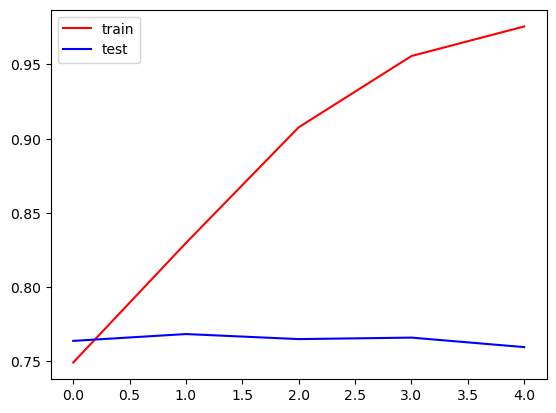

In [14]:
#Without Batch Normalization and Dropouts
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test')

plt.legend()
plt.show()

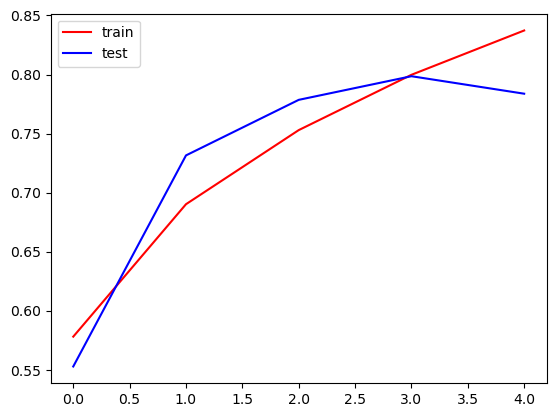

In [20]:
#With normalization and dropouts
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test')

plt.legend()
plt.show()

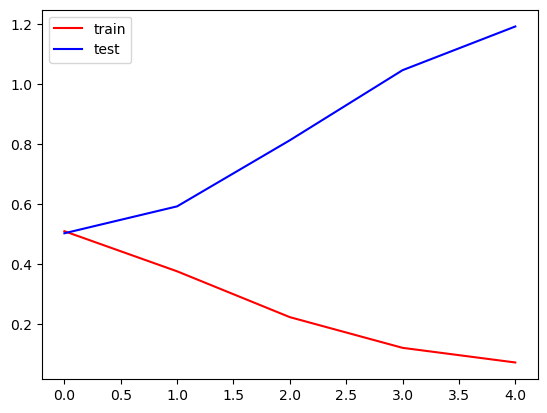

In [15]:
#Without Batch Normalization and Dropouts
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'test')

plt.legend()
plt.show()

In [ ]:
#Now we are facing overfitting, so we can use the following techniques to improve performance of validation data

# Add more data
# Data augumentation
# L1/L2 regularization
# add Drop out layer
# Batch Norm
#Reduce Complexity

In [43]:
#Testing on custom input
import cv2
test_img = cv2.imread('/kaggle/input/testing/cat.jpg')

In [44]:
test_img.shape

(1081, 1810, 3)

In [45]:
test_img = cv2.resize(test_img, (256, 256))
#Convert the image into a batch of single image
test_input = test_img.reshape((1,256,256,3))

1/1 [==============================] - 0s 19ms/step
Cat


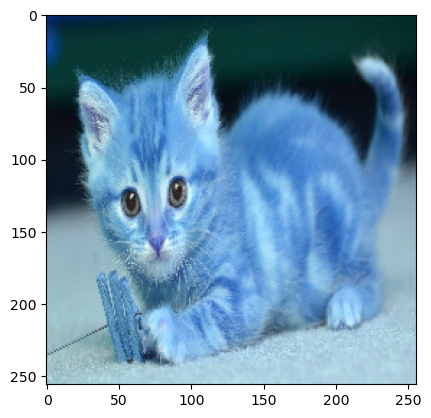

In [46]:
pre = model.predict(test_input)
plt.imshow(test_img)
if pre==0:
    print('Cat')
else:
    print("Doggo")